# Venn diagram of IFN+ in prior single-cell
Makes Venn diagram using data from [Russell et al (2018)](https://elifesciences.org/articles/32303).

Make plot using [matplotlib-venn](https://github.com/konstantint/matplotlib-venn).

In [1]:
import numpy
import matplotlib_venn
import matplotlib.pyplot as plt

from dms_tools2.plot import COLOR_BLIND_PALETTE_GRAY
from dms_tools2.ipython_utils import showPDF

/Users/jbloom/Documents/software/conda/envs/BloomLab/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Get counts for different combinations of infected, NS-, and IFN- .
Numbers taken from results section of [Russell et al (2018)](https://elifesciences.org/articles/32303), looking at all four samples (6 hour, both 8 hour replicates, 10 hours).
Specifically:
 - 368 infected cells total, see [Figure 4D](https://elifesciences.org/articles/32303#fig4)
 - 29 infected cells missing NS, estimated from weighted average of fraction of cells NS-1 (92%, calculated from [Figure 5 - source data 2](https://elifesciences.org/download/aHR0cHM6Ly9jZG4uZWxpZmVzY2llbmNlcy5vcmcvYXJ0aWNsZXMvMzIzMDMvZWxpZmUtMzIzMDMtZmlnNS1kYXRhMS12Mi5jc3Y=/elife-32303-fig5-data1-v2.csv?_hash=uRQpEsk5jxESjm57zijVO9KFEe859ED99LvGBA0kjcg%3D)) and total number of cells.
 - 1 cell IFN+, see [Figure 8D](https://doi.org/10.7554/eLife.32303.030)

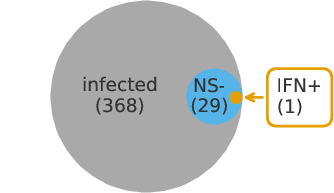

<Figure size 230.4x158.4 with 0 Axes>

In [2]:
groups = ['infected', 'NS-', 'IFN+']

counts = {'infected':368,
          'NS-':29,
          'IFN+':1}

subsets = {'100':counts['infected'] - counts['NS-'] - counts['IFN+'], 
           '110':counts['NS-'] - counts['IFN+'],
           '111':counts['IFN+']
          }

# make Venn diagram
plt.figure(figsize=(3.2, 2.2))
v = matplotlib_venn.venn3(subsets, ['' for g in groups])

v.get_patch_by_id('100').set_color(COLOR_BLIND_PALETTE_GRAY[0])
v.get_patch_by_id('100').set_alpha(1)
v.get_label_by_id('100').set_text(f'infected\n({counts["infected"]})')

v.get_patch_by_id('110').set_color(COLOR_BLIND_PALETTE_GRAY[2])
v.get_patch_by_id('110').set_alpha(1)
v.get_label_by_id('110').set_text(f'NS-\n({counts["NS-"]})')

v.get_patch_by_id('111').set_color(COLOR_BLIND_PALETTE_GRAY[1])
v.get_patch_by_id('111').set_alpha(1)
v.get_label_by_id('111').set_text('')

plt.annotate(f'IFN+\n({counts["IFN+"]})',
             xy=v.get_label_by_id('111').get_position() + numpy.array([0.05, 0]),
             xytext=(20, 0),
             ha='left', 
             va='center',
             textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor=COLOR_BLIND_PALETTE_GRAY[1], facecolor='none'),
             arrowprops=dict(arrowstyle='->', color=COLOR_BLIND_PALETTE_GRAY[1]),
             )

# save plot
venn_plot = 'venn_diagram.pdf'
#plt.tight_layout()
plt.savefig(venn_plot, bbox_inches='tight', pad_inches=0.1)
plt.clf()

showPDF(venn_plot)